# Basic Example
While watching [this video](https://www.youtube.com/watch?v=3CeD0eefeQc&list=PLXy71rkGuCjUyHPkvSd-a_LUUZqcBQgOb&index=4&t=329s) Lars discusses standard deviation. Let's dive into a basic example of standard deviation in the context of financial markets to help understand.

Imagine we're analyzing the closing prices of a company's stock over a week to understand its volatility. The closing prices were:

In [1]:
daily_closing_prices = {
    'Monday': 100,
    'Tuesday': 102,
    'Wednesday': 101,
    'Thursday': 105,
    'Friday': 98
}

### 1. Calculate the mean of the stock prices.

In [2]:
closing_prices = list(daily_closing_prices.values())
mean_price = sum(closing_prices) / len(closing_prices)

print(f"The mean closing price is: £{mean_price:.2f}")

The mean closing price is: £101.20


### 2. Calculate the deviations from the mean.

In [3]:
deviations = []

for price in daily_closing_prices.values():
    deviations.append(price - mean_price)

print("Deviations:", deviations)

Deviations: [-1.2000000000000028, 0.7999999999999972, -0.20000000000000284, 3.799999999999997, -3.200000000000003]


### 3. Square the deviations. 
This eliminates negative values and gives more weight to larger deviations.

In [4]:
squared_deviations = [x ** 2 for x in deviations]
print("Squared deviations:", squared_deviations)

Squared deviations: [1.4400000000000068, 0.6399999999999955, 0.04000000000000114, 14.439999999999978, 10.240000000000018]


### 4. Calculate the variance.
Variance represents the dispersion or spread of a set of data points. It tells you how much the data points in a set differ from the mean value (or how spread out the numbers are).

In [5]:
variance = sum(squared_deviations) / len(squared_deviations)
print("Variance:", variance)

Variance: 5.359999999999999


### 5. Take the square root of the variance.
Taking the root of the variance gives the standard deviation.

In [6]:
import math

standard_deviation = math.sqrt(variance)
print("Standard deviation:", standard_deviation)

Standard deviation: 2.315167380558045


## Explanation
This means that, on average, the stock's closing price deviated from the weekly mean by about £2.316. A higher standard deviation would indicate a greater volatility, suggesting that the stock's price is more spread out over a range of values, which would be seen as riskier by investors. Conversely, a lower standard deviation indicates less volatility and potentially less risk.

# Alternative Approach
We can use `numpy` to calculate the standard deviation as follows:

In [7]:
import numpy as np
numpy_std_dev = np.std(closing_prices, ddof=0)
print("Numpy standard deviation:", standard_deviation)

Numpy standard deviation: 2.315167380558045


### A Note on `DDOF`
Notice that the `std` function has a `ddof` parameter, which stands for *Delta Degrees of Freedom*. In statistics, the standard deviation can be calculated slightly differently depending on whether you're working with a sample of the entire population:

- When calculating the variance, you typically divide the sum of the squared deviations by the number of data points. For a population variance, this is straightforward — you divide by `N`, the number of data points.
- However, for a sample taken from a larger population, you often want to estimate the population variance. In this case, you'd divide by `N-1` instead of `N`, which is called Bessel's correction. This correction decreases the bias in the estimation of the population variance from a sample.

---

# Linking Standard Deviation to Normal Distribution
A normal distribution (or Gaussian distribution) is a continuous probability distribution that is symmetric around the mean, showing that data near the mean are more frequent in occurance than data far from the mean. The standard deviation plays a crucial role in the normal distribution:

### Shape and Spread
The standard deviation determines the spread of the distribution. A smaller standard deviation means the data is closely clustered around the mean, resulting in a steeper bell curve. A larger standard deviation indicates that the data is spread out over a wider range of values, leading to a flatter bell curve.

### Empirical Rule
In a normal distribution, approximately 68% of the data falls within one standard deviation of the mean, about 95% falls within two standard deviations, and about 99.7% falls within three standard deviations. This is known as the 68-95-99.7 (empirical) rule.

**Note: There are also more features but they're not relevant in this case.**

## Extending Our Example
Since our initial example only had 5 data points, it's not useful for visualising the normal distribtuion. However, we can use our existing mean and standard deviation to simulate additional prices:

In [8]:
simulated_prices = np.random.normal(loc=mean_price, scale=numpy_std_dev, size=1000)

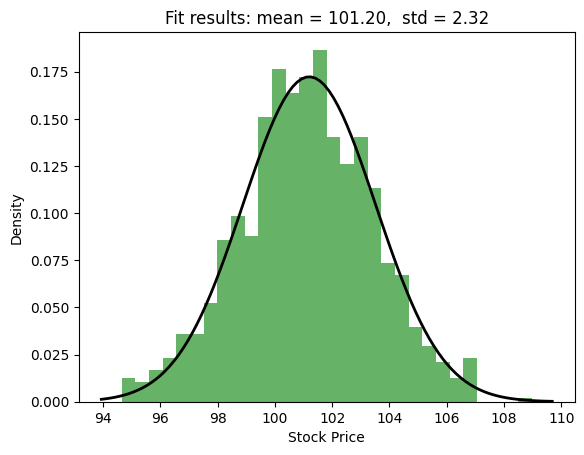

In [23]:
import matplotlib.pyplot as plt

# Plot a histogram of the simulated prices
plt.hist(simulated_prices, bins=30, density=True, alpha=0.6, color='g')

# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5*((x-mean_price)/numpy_std_dev)**2) / (numpy_std_dev * np.sqrt(2*np.pi))
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mean = %.2f,  std = %.2f" % (mean_price, numpy_std_dev)
plt.title(title)
plt.xlabel('Stock Price')
plt.ylabel('Density')

# Show the plot
plt.show()